In [55]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sb

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
import xgboost as xgb

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [56]:
iris = pd.read_csv("IRIS.csv")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


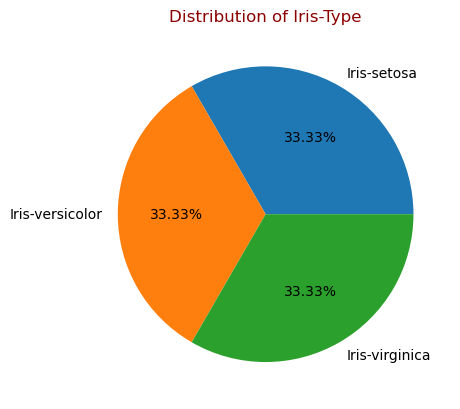

In [57]:
plt.title("Distribution of Iris-Type", c = 'darkred')
plt.pie(iris.species.value_counts(), autopct="%.2f%%", labels = iris.species.unique())
plt.show()

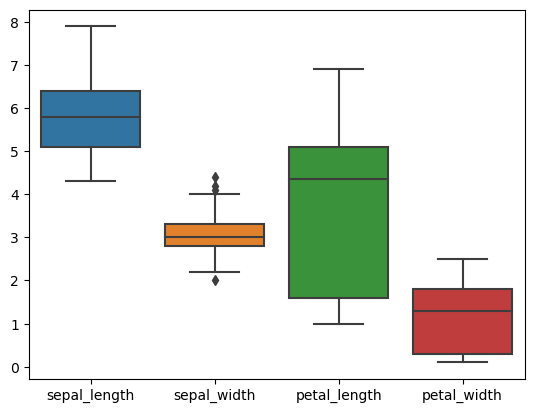

In [58]:
sb.boxplot(iris)
plt.show()

#### Boxplot show there is no Outliers in the dataset provided. So just scaling will be done.

In [59]:
X = iris.drop('species', axis = 1)
y = iris.species

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20)

ss = StandardScaler()
Xt_train = ss.fit_transform(X_train)
Xt_test = ss.transform(X_test)

#### **Training of different models to get best fit model for IRIS type classification**

In [60]:
knn_model = KNeighborsClassifier()
c_score = cross_val_score(knn_model, Xt_train, y_train, cv = 5, scoring = 'accuracy')

print("Cross Validation score: ", c_score)
print("Mean Cross Validation Score: ", c_score.mean())
print("Standard Deviation of Cross Val. Score: ", np.std(c_score))

Cross Validation score:  [1.         0.95652174 0.95454545 1.         0.95454545]
Mean Cross Validation Score:  0.9731225296442687
Standard Deviation of Cross Val. Score:  0.021957224367321955


In [61]:
lr_model = LogisticRegression()
c_score = cross_val_score(lr_model, Xt_train, y_train, cv = 5, scoring = 'accuracy')

print("Cross Validation score: ", c_score)
print("Mean Cross Validation Score: ", c_score.mean())
print("Standard Deviation of Cross Val. Score: ", np.std(c_score))

Cross Validation score:  [0.95652174 0.95652174 1.         0.95454545 0.95454545]
Mean Cross Validation Score:  0.9644268774703558
Standard Deviation of Cross Val. Score:  0.01780850644437755


In [62]:
dtc_model = DecisionTreeClassifier(random_state = 42)
c_score = cross_val_score(dtc_model, Xt_train, y_train, cv = 5, scoring = 'accuracy')

print("Cross Validation score: ", c_score)
print("Mean Cross Validation Score: ", c_score.mean())
print("Standard Deviation of Cross Val. Score: ", np.std(c_score))

Cross Validation score:  [0.95652174 0.95652174 1.         0.95454545 0.90909091]
Mean Cross Validation Score:  0.9553359683794467
Standard Deviation of Cross Val. Score:  0.028764277310134794


In [63]:
rfc_model = RandomForestClassifier(random_state = 42)
c_score = cross_val_score(rfc_model, Xt_train, y_train, cv = 5, scoring = 'accuracy')

print("Cross Validation score: ", c_score)
print("Mean Cross Validation Score: ", c_score.mean())
print("Standard Deviation of Cross Val. Score: ", np.std(c_score))

Cross Validation score:  [0.95652174 0.95652174 1.         0.95454545 0.95454545]
Mean Cross Validation Score:  0.9644268774703558
Standard Deviation of Cross Val. Score:  0.01780850644437755


In [64]:
gbr_model = GradientBoostingClassifier(random_state = 42)
c_score = cross_val_score(gbr_model, Xt_train, y_train, cv = 5, scoring = 'accuracy')

print("Cross Validation score: ", c_score)
print("Mean Cross Validation Score: ", c_score.mean())
print("Standard Deviation of Cross Val. Score: ", np.std(c_score))

Cross Validation score:  [0.95652174 1.         1.         0.95454545 0.95454545]
Mean Cross Validation Score:  0.9731225296442687
Standard Deviation of Cross Val. Score:  0.021957224367321962


In [65]:
enc = LabelEncoder()
y_new_train = enc.fit_transform(y_train)
y_new_test = enc.transform(y_test)
xgb_model = xgb.XGBClassifier(eval_metric = 'logloss', random_state = 42)
c_score = cross_val_score(xgb_model, Xt_train, y_new_train, cv = 5, scoring = 'accuracy')

print("Cross Validation score: ", c_score)
print("Mean Cross Validation Score: ", c_score.mean())
print("Standard Deviation of Cross Val. Score: ", np.std(c_score))

Cross Validation score:  [0.95652174 0.95652174 1.         0.90909091 0.90909091]
Mean Cross Validation Score:  0.9462450592885375
Standard Deviation of Cross Val. Score:  0.0342393799647553


### Since the Cross validation score of two models are same ie LogisticRegression and RandomForestClassifier, we check for Accuracy score of both for test data

In [66]:
lr_model.fit(Xt_train, y_train)
rfc_model.fit(Xt_train, y_train)

lr_test_acc = accuracy_score(y_test, lr_model.predict(Xt_test))
rfc_test_acc = accuracy_score(y_test, rfc_model.predict(Xt_test))

print(f"Logistic Regression Test Accuracy: {lr_test_acc}")
print(f"RandomForest Classifier Test Accuracy: {rfc_test_acc}")

Logistic Regression Test Accuracy: 0.9210526315789473
RandomForest Classifier Test Accuracy: 0.9210526315789473


### To make best use we now use Ensemble classifier: VotingClassifier which uses base estimators to get best result, so will use any one of these

In [67]:
vc_model = VotingClassifier(estimators = [('lr',lr_model)], voting = 'soft')
vc_model.fit(Xt_train, y_train)

y_train_pred = vc_model.predict(Xt_train)
y_test_pred = vc_model.predict(Xt_test)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"VotingClassifier Train Accuracy: {train_acc}")
print(f"VotingClassifier Test Accuracy: {test_acc}")

cm_w_lr = confusion_matrix(y_test,y_test_pred)
print(cm_w_lr)

VotingClassifier Train Accuracy: 0.9732142857142857
VotingClassifier Test Accuracy: 0.9210526315789473
[[12  0  0]
 [ 0 14  0]
 [ 0  3  9]]


In [68]:
vc_model = VotingClassifier(estimators = [('lr',lr_model), ('rfc',rfc_model)], voting = 'soft')
vc_model.fit(Xt_train, y_train)

y_train_pred = vc_model.predict(Xt_train)
y_test_pred = vc_model.predict(Xt_test)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"VotingClassifier Train Accuracy: {train_acc}")
print(f"VotingClassifier Test Accuracy: {test_acc}")

cm_w_lr = confusion_matrix(y_test,y_test_pred)
print(cm_w_lr)

VotingClassifier Train Accuracy: 1.0
VotingClassifier Test Accuracy: 0.9210526315789473
[[12  0  0]
 [ 0 14  0]
 [ 0  3  9]]


In [69]:
vc_model = VotingClassifier(estimators = [('lr',lr_model), ('dtc',dtc_model)], voting = 'soft')
vc_model.fit(Xt_train, y_train)

y_train_pred = vc_model.predict(Xt_train)
y_test_pred = vc_model.predict(Xt_test)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"VotingClassifier Train Accuracy: {train_acc}")
print(f"VotingClassifier Test Accuracy: {test_acc}")

cm_w_lr = confusion_matrix(y_test,y_test_pred)
print(cm_w_lr)

VotingClassifier Train Accuracy: 1.0
VotingClassifier Test Accuracy: 0.9210526315789473
[[12  0  0]
 [ 0 14  0]
 [ 0  3  9]]


In [70]:
lr_model.fit(Xt_train, y_train)
y_train_pred = lr_model.predict(Xt_train)
y_test_pred = lr_model.predict(Xt_test)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"VotingClassifier Train Accuracy: {train_acc}")
print(f"VotingClassifier Test Accuracy: {test_acc}")

cm_w_lr = confusion_matrix(y_test,y_test_pred)
print(cm_w_lr)

VotingClassifier Train Accuracy: 0.9732142857142857
VotingClassifier Test Accuracy: 0.9210526315789473
[[12  0  0]
 [ 0 14  0]
 [ 0  3  9]]


#### If check confusion matrix for LogisticRegression model, we afterwards see that there is not change in any form. 
#### So we can use any model but since VotingClassifier uses all three base models which makes it Best Model.

In [73]:
lr_model = LogisticRegression(random_state = 42)
param_grid_lr = {
                'C': [0.01, 0.1, 1, 10, 100],
                'penalty': ['l1', 'l2'],        
                'solver': ['liblinear', 'saga'],
                'max_iter': [100, 200, 300]
                }
gscv = GridSearchCV(lr_model, param_grid = param_grid_lr, cv = 5, verbose = 1, n_jobs = 1)
gscv.fit(Xt_train, y_train)

print(gscv.best_params_)
best_lr_model = gscv.best_estimator_

Fitting 5 folds for each of 60 candidates, totalling 300 fits
{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}


In [75]:
dtc_model = DecisionTreeClassifier(random_state = 42)
param_grid_lr = {
                'criterion': ['gini', 'entropy'],          # Function to measure the quality of a split
                'max_depth': [None, 10, 20, 30, 40, 50],   # Maximum depth of the tree
                'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split an internal node
                'min_samples_leaf': [1, 2, 5, 10],          # Minimum number of samples required to be at a leaf node
                'max_features': [None, 'sqrt', 'log2'],     # Number of features to consider when looking for the best split
                'splitter': ['best', 'random']              # Strategy used to choose the split at each node
            }
gscv = GridSearchCV(dtc_model, param_grid = param_grid_lr, cv = 5, verbose = 1, n_jobs = 1)
gscv.fit(Xt_train, y_train)

print(gscv.best_params_)
best_dtc_model = gscv.best_estimator_

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}


In [76]:
vc_model = VotingClassifier(estimators = [('lr',best_lr_model), ('dtc',best_dtc_model)], voting = 'soft')
vc_model.fit(Xt_train, y_train)

y_train_pred = vc_model.predict(Xt_train)
y_test_pred = vc_model.predict(Xt_test)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"VotingClassifier Train Accuracy: {train_acc}")
print(f"VotingClassifier Test Accuracy: {test_acc}")

cm_w_lr = confusion_matrix(y_test,y_test_pred)
print(cm_w_lr)

VotingClassifier Train Accuracy: 0.9821428571428571
VotingClassifier Test Accuracy: 0.8947368421052632
[[12  0  0]
 [ 0 14  0]
 [ 0  4  8]]


### **BEST MODEL FOR PREDICTION**

VotingClassifier Train Accuracy: 1.0
VotingClassifier Test Accuracy: 0.9210526315789473

*****************************************************************

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.82      1.00      0.90        14
 Iris-virginica       1.00      0.75      0.86        12

       accuracy                           0.92        38
      macro avg       0.94      0.92      0.92        38
   weighted avg       0.93      0.92      0.92        38



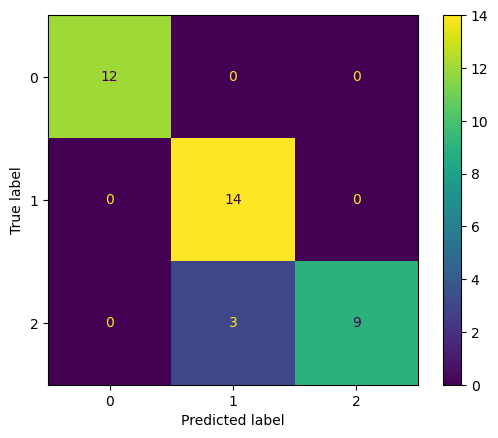

In [84]:
vc_model = VotingClassifier(estimators = [('lr',lr_model), ('dtc',dtc_model)], voting = 'soft')
vc_model.fit(Xt_train, y_train)

y_train_pred = vc_model.predict(Xt_train)
y_test_pred = vc_model.predict(Xt_test)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"VotingClassifier Train Accuracy: {train_acc}")
print(f"VotingClassifier Test Accuracy: {test_acc}")

print("\n*****************************************************************\n")

cm = confusion_matrix(y_test,y_test_pred)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

creport = classification_report(y_test,y_test_pred)
print(creport)

In [97]:
def prediction(sample):
    test = ss.transform(sample)
    pred = vc_model.predict(test)
    if type(sample) == list:
        sample = pd.DataFrame(sample, columns = ['sepal_length','sepal_width','petal_length','petal_width'])
    sample['Type Predicted'] = pred
    sample.to_csv("IRIS Type Prediction.csv", index = False)
    print("DONE")

In [98]:
#sample = iris.drop('species', axis=1).head(10)
sample = [[4.2,3.24,1.2,0.2],[6.4,3.4,4.4,1.4],[6.,3.,4.,1.]]
prediction(sample)

DONE
